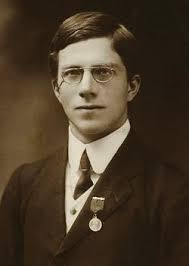

# Ronald Fisher

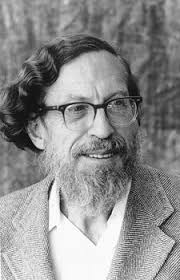
# Charles Stein

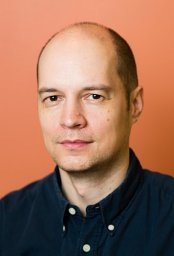

# Aapo Hyvärinen

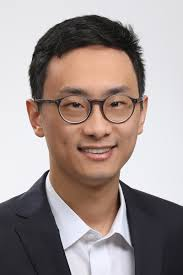
# Yang Song

# From Likelihood to Scores to Diffusion: One Connected Mathematical Story

---

## 1. Probability and Likelihood: The Starting Point

We begin with a probabilistic model for observable data:

$$
p(x \mid \theta),
$$

where $$x$$ denotes the data and $$\theta$$ the model parameters.

In inference, the same expression is interpreted as a **likelihood function**:

$$
L(\theta; x) = p(x \mid \theta),
$$

which evaluates how plausible different values of $$\theta$$ are given the observed data.

**Contribution.**  
Probability provides the language of modeling, while likelihood converts probabilistic modeling into a concrete estimation principle.

---

## 2. The Log Trick: Turning Products into Sums

Instead of maximizing the likelihood directly, one maximizes the **log-likelihood**:

$$
\ell(\theta; x) = \log p(x \mid \theta).
$$

This transformation is essential because:

- Products over independent samples become sums,
- Derivatives become numerically stable and analytically tractable.

**Contribution.**  
The logarithm makes optimization and asymptotic analysis feasible.

---

## 3. Derivatives with Respect to Parameters: The Classical Score

In classical statistics, the **score function** is defined as the gradient of the log-likelihood with respect to parameters:

$$
u(\theta; x) = \nabla_\theta \log p(x \mid \theta).
$$

Its variance defines the **Fisher information**:

$$
I(\theta) = \mathrm{Var}\big[u(\theta; X)\big].
$$

**Contribution.**  
This connects the curvature of the likelihood to fundamental limits of estimation, such as the Cramér–Rao bound and the asymptotic covariance of the maximum likelihood estimator.

Up to this point, the term *score* refers to derivatives with respect to $$\theta$$.

---

## 4. A Second Score Appears: Derivative with Respect to Data

For generative modeling and physics-inspired systems, attention shifts to derivatives with respect to the **data** itself:

$$
s_p(x) = \nabla_x \log p(x).
$$

This object is a **vector field over data space**, not parameter space.

Hyvärinen adopts this viewpoint and defines the model score as

$$
\psi(\xi; \theta) = \nabla_\xi \log q(\xi; \theta),
$$

which crucially does **not** depend on the normalization constant $$Z(\theta)$$.

**Contribution.**  
The focus moves from estimating $$\theta$$ to learning the *shape and forces* of the density in $$x$$-space.

---

## 5. Stein’s Key Idea: Distributions via Operator Identities

Stein’s method reframes distributional equality as an operator condition.  
Given a distribution $$Q$$, there exists an operator $$A$$ such that

$$
\mathbb{E}_{Y \sim Q}\big[(Af)(Y)\big] = 0
$$

for all suitable test functions $$f$$ if and only if $$Y \sim Q$$.

For smooth densities, Stein operators naturally involve terms of the form

$$
\nabla_x \log p(x),
$$

which is precisely a data-space score.

**Contribution.**  

- Moves from densities to operator identities,
- Measures distributional discrepancy by how strongly an identity is violated.

This is the conceptual origin of the term **Stein score**: not a new derivative, but the score function embedded inside Stein identities.

---

## 6. Score Matching (Hyvärinen, 2005): Learning Without Normalization

Hyvärinen’s central insight is that one can fit models **without computing** the normalization constant $$Z(\theta)$$ by matching scores.

He proposes minimizing

$$
J(\theta)
=
\frac{1}{2}
\int
p_x(\xi)\,
\big\|
\psi(\xi; \theta) - \psi_x(\xi)
\big\|^2
\, d\xi,
$$

where

$$
\psi_x(\xi) = \nabla_\xi \log p_x(\xi)
$$

is the unknown data score.

The key technical step is an **integration-by-parts identity**, which removes dependence on $$\psi_x$$ and yields an objective involving only derivatives of the model score.

**Contribution.**  
Transforms “learning the score field” into a computable, normalization-free objective for continuous unnormalized models.

---

## 7. From Static Scores to Time-Dependent Scores

Modern generative modeling requires scores for a **family of distributions**, not just one.

Song et al. introduce a time-dependent score network:

$$
s_\theta(x, t),
$$

trained via a continuous-time generalization of score matching.

This framework unifies:

- Denoising score matching,
- Multi-noise-level training,
- Practical sampling through Langevin-type dynamics.

**Contribution.**  
Score matching becomes the learning engine for an entire diffusion path $$\{p_t\}$$.

---

## 8. The Generative Leap: Reverse-Time SDEs Require the Score

A central theoretical result in diffusion modeling states that the reverse of a forward diffusion is itself a diffusion, governed by the reverse-time SDE:

$$
dx
=
\Big[
f(x,t)
-
g(t)^2
\nabla_x \log p_t(x)
\Big]\, dt
+
g(t)\, d\bar{w}.
$$

Once the score

$$
\nabla_x \log p_t(x)
$$

is known for all $$t$$, the reverse process can be simulated to generate samples from $$p_0$$.

Crucially, Song et al. show that this score is learned via **time-dependent score matching**, directly building on Hyvärinen’s framework.

**Contribution.**  
The score field becomes the *drift correction* that turns noise back into data.

---

## The Entire Storyline in One View

- Probability $$p(x \mid \theta)$$ models reality.
- The log transform $$\log p$$ enables optimization and curvature analysis.
- Derivatives with respect to $$\theta$$ give the classical score and Fisher information.
- Derivatives with respect to $$x$$ give the data-space score field $$\nabla_x \log p(x)$$.
- Stein’s method elevates this score into an operator identity for distribution comparison.
- Hyvärinen (2005) makes score learning computable for unnormalized models via integration by parts.
- Song et al. extend score matching across time and show that the learned score drives reverse diffusion dynamics.

**Final Insight.**  
In modern diffusion and score-based generative modeling, the object being learned is neither a likelihood nor a partition function. It is the **score field**—an idea made learnable by Stein-style identities and Hyvärinen-style objectives, and transformed into a generative mechanism by reverse-time stochastic differential equations.
